In [127]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [128]:
trainx = np.genfromtxt('trainx.csv', delimiter=',')
trainy = np.genfromtxt('trainy.csv', delimiter=',')
testx = np.genfromtxt('testx.csv', delimiter=',')
testy = np.genfromtxt('testy.csv', delimiter=',')
trainx.shape, trainy.shape,testx.shape,testy.shape
losses = np.dot(np.linalg.inv(np.dot(x.T,x)+C),np.dot(x.T,y))

NameError: name 'x' is not defined

[ 0.02248718  0.03535459  0.0726373   0.02240391  0.25016724  0.01226698
  0.14617295 -0.0201248   0.19064    -0.02313768  0.13565075  0.18897994
  0.03162252  0.17997769 -0.01139938  0.17577163 -0.07748728 -0.02502374
 -0.0712598   0.25532998  0.00677786  0.05497884  0.02518449  0.08938905
 -0.11583076  0.09735753 -0.00615424  0.00671738 -0.0340672   0.04623725
  0.054144    0.03716261 -0.01406523 -0.03321537  0.0468939  -0.00822138
  0.04861304  0.0056782  -0.02939626 -0.09255108  0.01260787  0.00708992
  0.06301683  0.00202622 -0.02035197  0.02139933 -0.01695013  0.01981226
  0.01164189 -0.04571215  0.0101167   0.00728731 -0.01327394 -0.06157816
  0.09786038 -0.06000885  0.0501009   0.09338992  0.06226628 -0.03425591
  0.08611753  0.032375   -0.04298204  0.04240448 -0.08784142 -0.01694936
  0.01098606 -0.07143842  0.07917408  0.04231825  0.0395751  -0.00578661
  0.02281827 -0.0231847   0.00028843  0.07573987  0.00162887 -0.03033197
  0.00751662 -0.02813167  0.01535659 -0.04509141 -0

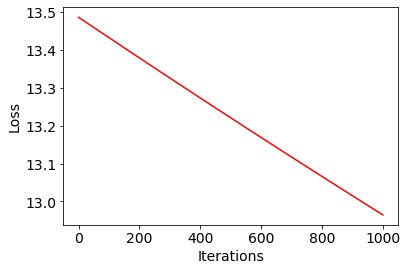

In [129]:
from sklearn import preprocessing

normalized_X = preprocessing.normalize(trainx)

def cost_function(X,y,theta,C):
    m = len(y) 
    J = 0
    
    pred = X @ theta
    J_reg = (C / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (pred - y).T @ (pred - y)) + J_reg;
    return J 

def ridge_regression_GD(x,y,C):
    learning_rate = 0.001  
    iterations = 1000
    m = np.size(y)
    losses = np.zeros(iterations)
    theta = np.zeros(100)
    
    for i in range(iterations):
        pred = np.dot(x,theta)
        theta = theta - learning_rate * (1/m)* (  (x.T @ (pred-y)) + C * theta )     
        losses[i] = cost_function(x,y,theta,C)

    return theta ,losses

theta ,losses = ridge_regression_GD(normalized_X,trainy,1.0)

print(theta)
plt.plot(losses,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

In [130]:
from sklearn import linear_model

def lasso_cost_function(trainx, trainy, theta, theta_0, C):
    samples = len(trainy)
    loss = 0
    
    loss = np.sum(((trainy - trainx.dot(theta) + theta_0)**2))
        
    loss = loss + C * (abs(theta))
    return loss

def lasso_regression_GD(x,y,C):
    lasso = linear_model.Lasso(alpha=0.001)
    lasso.fit(x, y)
    w = lasso.coef_
    b = lasso.intercept_
    losses = []
    
    return w,b,losses
    
w,b,losses = lasso_regression_GD(normalized_X,trainy,600)
print(w)
print(b)

[-0.00000000e+00 -1.50798198e+00  1.13466197e+01  0.00000000e+00
  1.86440209e+01 -1.31814722e-01  7.40525516e+00  0.00000000e+00
  1.82858609e+01  1.25218859e+00  1.02856046e+01  2.35393148e+01
  2.60031372e-01  5.35660365e+00 -1.93524388e+00  1.80215691e+01
 -2.58103637e+00  7.98310649e+00  4.69037502e-01  2.25316505e+01
  1.25561708e-03  6.50603215e-01  2.22065525e+00  0.00000000e+00
 -2.31511451e+00 -1.24544796e-01 -2.02187889e-01 -0.00000000e+00
  6.63213923e-01 -0.00000000e+00  2.28138237e+00 -1.64843300e+00
  0.00000000e+00 -1.03737697e+00 -1.82969768e+00 -0.00000000e+00
 -2.51591612e-01  2.06030888e+00  3.94268476e+00  6.65239711e-01
 -1.14403815e+00  1.96873244e+00 -0.00000000e+00  1.23596098e+00
  8.46980931e-02  2.06990825e+00  2.48416475e+00  1.25671947e+00
 -6.20250911e-01 -1.20015565e+00  6.50496406e-02  0.00000000e+00
  1.45181669e+00  9.47158286e-01  1.60796896e-01  0.00000000e+00
  2.46212317e+00  8.43309773e-01 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.56428

In [131]:
def compute_mse(w,b,x,y):
    samples = len(y)
    J = np.sum((x.dot(w) - y) ** 2)/(2 * samples)
    return J
    
# Set regularization constant
C = 1.0 # you can change it
# Run gradient descent solver and compute its MSE
w, losses = ridge_regression_GD(trainx, trainy, C)
# Use built-in routine for linear regression and compute MSE
lin_regr = linear_model.LinearRegression()
lin_regr.fit(trainx, trainy)
# Use built-in routine for ridge regression and compute MSE
ridge_regr = linear_model.Ridge(alpha=1.0) # you can try different values
ridge_regr.fit(trainx, trainy)
# Print MSE values
print ("MSE of built-in linear regression(training): ", mean_squared_error(lin_regr.predict(trainx), trainy))
print ("MSE of gradient descent solver for ridge regression (training): ", compute_mse(w,b,trainx, trainy))
print ("MSE of built-in solver for ridge regression (training): ", mean_squared_error(ridge_regr.predict(trainx), trainy))
print ("MSE of built-in linear regression(test): ", mean_squared_error(lin_regr.predict(testx), testy))
print ("MSE of gradient descent solver for ridge regression (test): ", compute_mse(w,b,testx, testy))
print ("MSE of built-in solver for ridge regression (test): ", mean_squared_error(ridge_regr.predict(testx), testy))


MSE of built-in linear regression(training):  1.3927486422724714e-28
MSE of gradient descent solver for ridge regression (training):  1.3353171354017344
MSE of built-in solver for ridge regression (training):  0.03480412397500122
MSE of built-in linear regression(test):  50.98181057763657
MSE of gradient descent solver for ridge regression (test):  4.8859572319037925
MSE of built-in solver for ridge regression (test):  4.590164991621038


In [132]:
# Set regularization constant
C = 1.0 # you can change it
# Run gradient descent solver and compute its MSE
w, b, losses = lasso_regression_GD(trainx,trainy,C)
# Use built-in routine for ridge regression and compute MSE
lasso_regr = linear_model.Lasso(alpha=1.0) # you can try different values
lasso_regr.fit(trainx,trainy)
# Print MSE values
print ("MSE of built-in linear regression(training): ", mean_squared_error(lin_regr.predict(trainx), trainy))
print ("MSE of gradient descent solver for lasso regression (training): ", compute_mse(w,b,trainx, trainy))
print ("MSE of built-in solver for lasso regression (training): ", mean_squared_error(lasso_regr.predict(trainx), trainy))
print ("MSE of built-in linear regression(test): ", mean_squared_error(lin_regr.predict(testx), testy))
print ("MSE of gradient descent solver for lasso regression (test): ", compute_mse(w,b,testx, testy))
print ("MSE of built-in solver for lasso regression (test): ", mean_squared_error(lasso_regr.predict(testx), testy))

MSE of built-in linear regression(training):  1.3927486422724714e-28
MSE of gradient descent solver for lasso regression (training):  0.011272278703378033
MSE of built-in solver for lasso regression (training):  8.78299643035392
MSE of built-in linear regression(test):  50.98181057763657
MSE of gradient descent solver for lasso regression (test):  2.7277095698900076
MSE of built-in solver for lasso regression (test):  9.566046105001256
